# Description

This project focuses on the critical challenge of predicting food delivery times for services such as Zomato and Swiggy, aiming to enhance operational efficiency and customer satisfaction. It involves developing a sophisticated predictive model that leverages historical data on delivery durations and incorporates the distances between pickup and delivery points. By analyzing patterns in how delivery times have varied with distance in the past, the model provides accurate delivery time estimations. This not only helps in setting realistic expectations for customers but also enables delivery services to optimize their delivery processes, reduce wait times, and improve overall service quality. The core of this project lies in its data-driven approach to solving a common yet complex problem faced by food delivery platforms, making it a valuable tool for businesses looking to streamline their delivery operations.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(r'D:\Data_Projects\Food_Delivery_Time_Prediction\Src\lib')
from helper_functions import *

pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x )
pd.set_option('display.width', 500)

print("All of the libraries loaded")

All of the libraries loaded


## Loading Datasets

In [2]:
path = r'D:\Data_Projects\Food_Delivery_Time_Prediction\Src\data\Delivery-time\deliverytime.txt'
data = pd.read_csv(path)

In [3]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.900,22.745,75.892,22.765,75.912,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.500,12.913,77.683,13.043,77.813,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.400,12.914,77.678,12.924,77.688,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.700,11.004,76.976,11.054,77.026,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.600,12.973,80.250,13.013,80.290,Snack,scooter,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [5]:
print(f'There are {data.shape[0]} rows')
print(f'There are {data.shape[1]} columns')

There are 45593 rows
There are 11 columns


## Columns Information

ID: order ID number 

Delivery_person_ID: ID number of the delivery partner

Delivery_person_Age: Age of the delivery partner

Delivery_person_Ratings: ratings of the delivery partner based on past deliveries

Restaurant_latitude: The latitude of the restaurant

Restaurant_longitude: The longitude of the restaurant

Delivery_location_latitude: The latitude of the delivery location

Delivery_location_longitude: The longitude of the delivery location

Type_of_order: The type of meal ordered by the customer

Type_of_vehicle: The type of vehicle delivery partner rides

Time_taken(min): The time taken by the delivery partner to complete the order

## Data Cleaning

Here, I want to manage the columns names , all of them with lower letter 

In [6]:
data.columns = data.columns.str.lower()

Checking Missing values 

In [7]:
data.isnull().sum().sum()

0

Cheching Duplicated values 

In [8]:
data.duplicated().sum()

0

In this case, There are no Missing and Duplicated values , Thank god :)

## General Information

Now, I Split the columns to Numerical and Categorical

In [9]:
get_column_types(data)

Numerical columns are: ['delivery_person_age', 'delivery_person_ratings', 'restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'time_taken(min)']
Categorical columns are: ['id', 'delivery_person_id', 'type_of_order', 'type_of_vehicle']


{'numerical': ['delivery_person_age',
  'delivery_person_ratings',
  'restaurant_latitude',
  'restaurant_longitude',
  'delivery_location_latitude',
  'delivery_location_longitude',
  'time_taken(min)'],
 'categorical': ['id',
  'delivery_person_id',
  'type_of_order',
  'type_of_vehicle'],
 'other': []}

Here, I have tow variable which define Numerical and Categorical columns

In [10]:
numerical_columns = get_column_types(data,verbose=False)['numerical']
categorical_columns = get_column_types(data,verbose=False)['categorical']

Informations About `type_of_order` and `type_of_vehicle` columns

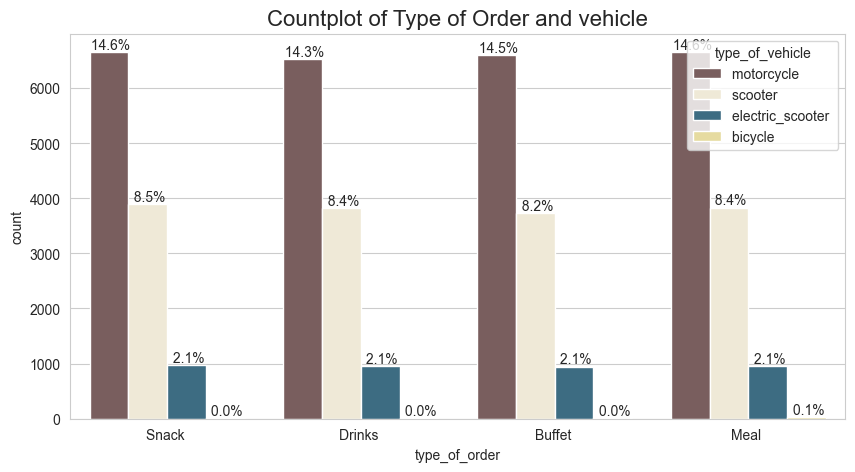

In [11]:
countplot(
    data = data,
    column_name = 'type_of_order',
    title= "Countplot of Type of Order and vehicle",
    hue = 'type_of_vehicle',
    figsize=(10, 5),
    bar_labels = True,
    horizontal = False,
);

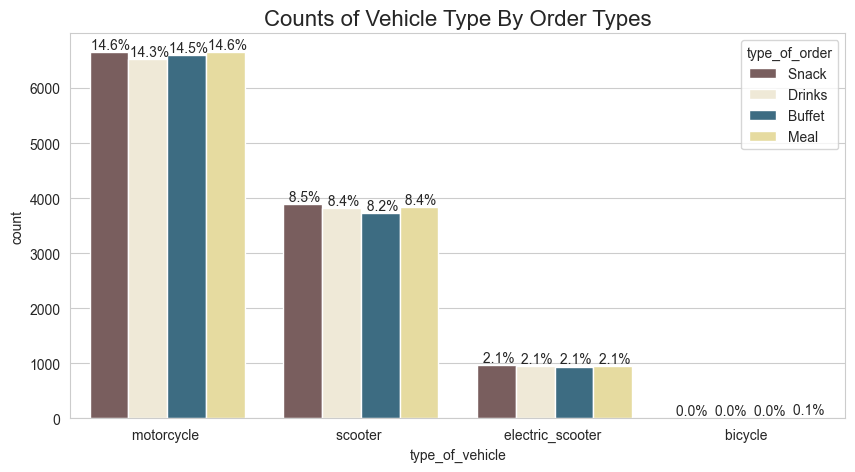

In [12]:
countplot(
    data = data,
    column_name = 'type_of_vehicle',
    title= "Counts of Vehicle Type By Order Types",
    hue = 'type_of_order',
    figsize=(10, 5),
    bar_labels = True,
    horizontal = False,
);

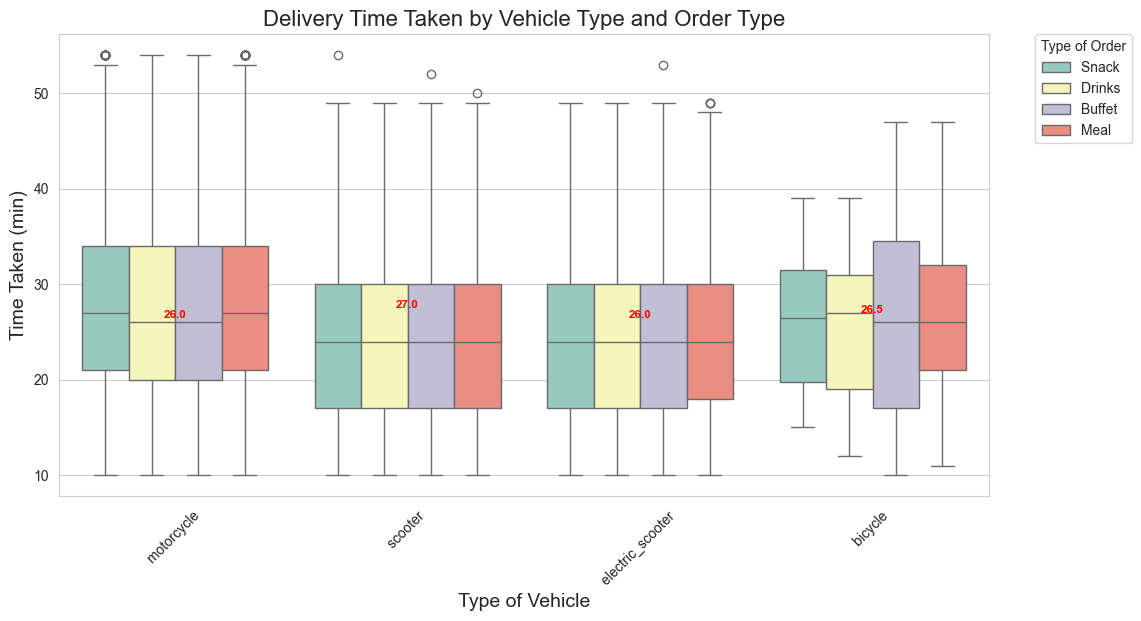

In [13]:
plt.figure(figsize=(12, 6))

box = sns.boxplot(
    data=data,
    x='type_of_vehicle',
    y='time_taken(min)',
    hue='type_of_order',
    palette='Set3',
)

plt.xlabel('Type of Vehicle', fontsize=14)
plt.ylabel('Time Taken (min)', fontsize=14)
plt.title('Delivery Time Taken by Vehicle Type and Order Type', fontsize=16)

plt.xticks(rotation=45)

plt.legend(title='Type of Order', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

medians = data.groupby(['type_of_vehicle', 'type_of_order'])['time_taken(min)'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, box.get_xticklabels()):
    box.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
             horizontalalignment='center', size='small', color='r', weight='semibold')

plt.show()

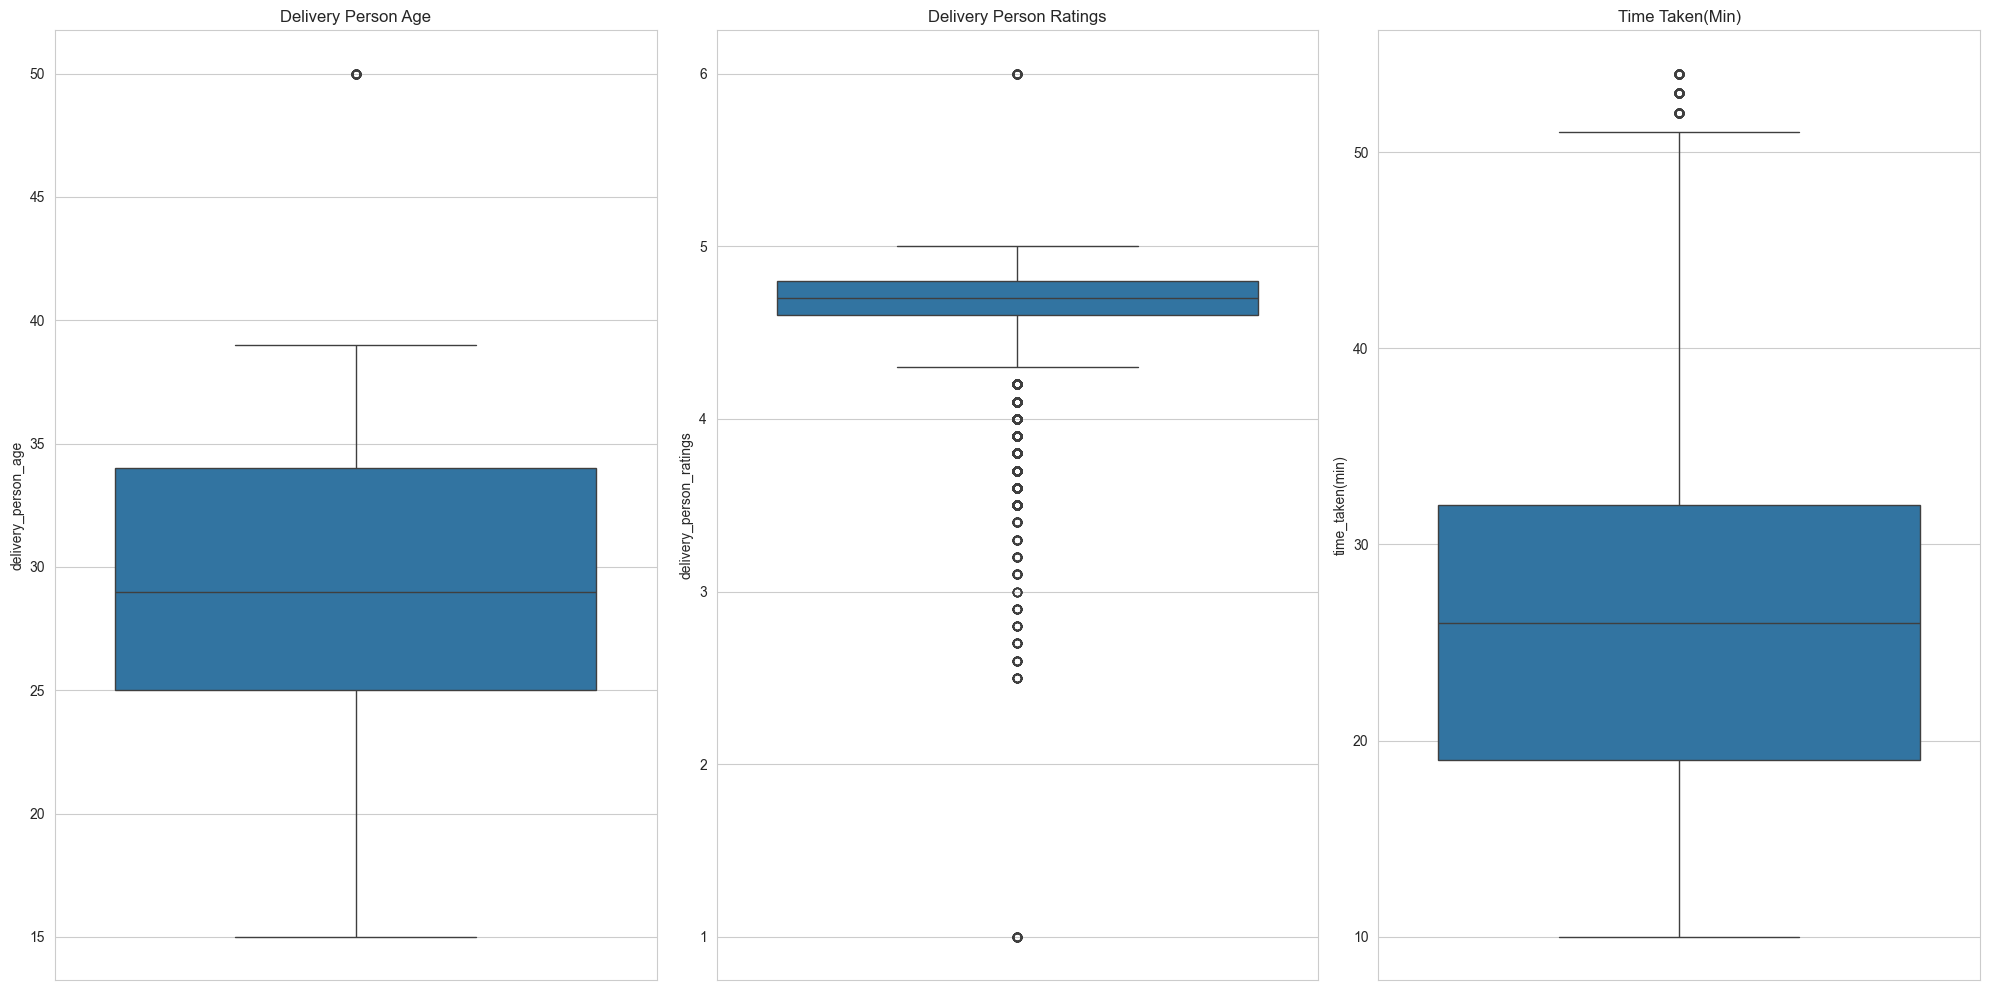

In [14]:
plt.figure(figsize=(20, 10))

columns_to_plot = [
    'delivery_person_age',
    'delivery_person_ratings',
    'time_taken(min)'
]

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(y=data[column])
    plt.title(column.replace('_', ' ').title())

plt.tight_layout()
plt.show()

Lets see `delivery_person_ratings` distrubiotion

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


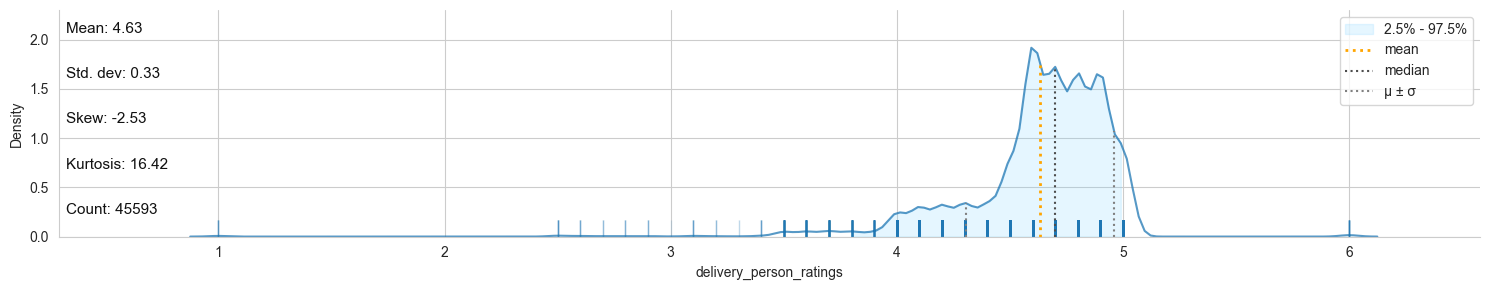

In [15]:
klib.dist_plot(data['delivery_person_ratings']);

Information about Delivery ratings unique

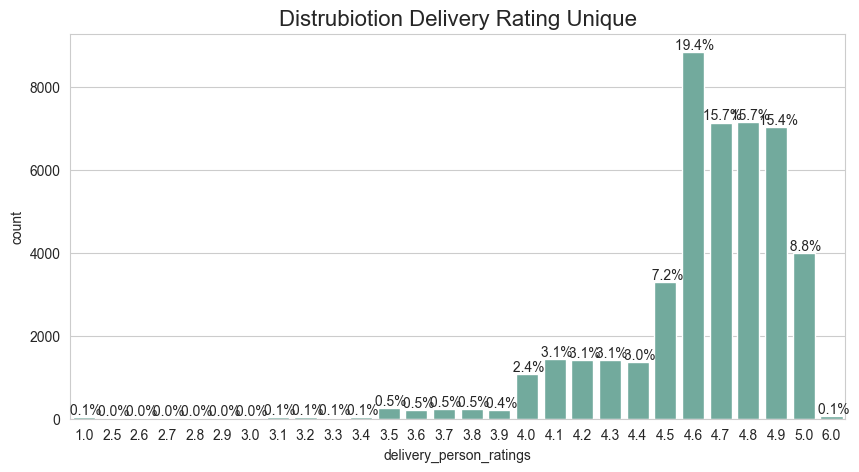

In [16]:
countplot(
    data = data,
    column_name = 'delivery_person_ratings',
    bar_labels = True,
    title = 'Distrubiotion Delivery Rating Unique'
);

Here, I find the most rate is **4.6** and I should investigation about rate.

So, I concludeed to create new feature to identify Gereral Rate (1,2,3,...)

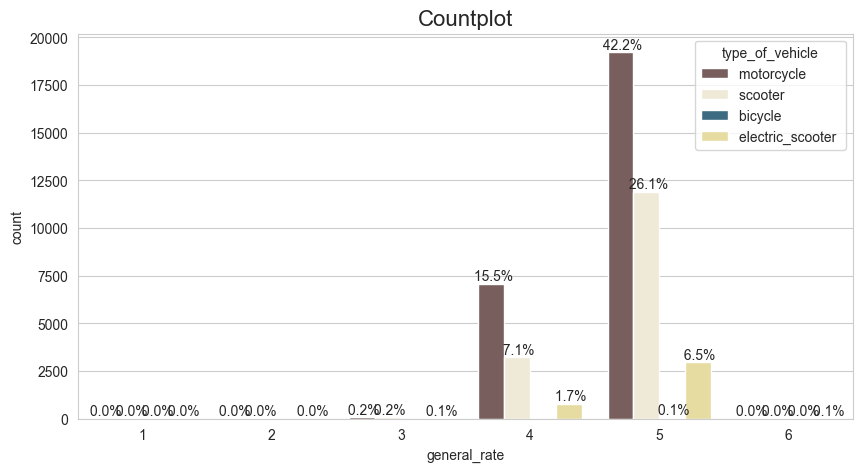

In [17]:
data['general_rate'] = data['delivery_person_ratings'].round().astype(int)

countplot(
    data = data,
    column_name = 'general_rate',
    bar_labels = True,
    hue = 'type_of_vehicle',
);

Ploting rate of the delivery portners distribution 

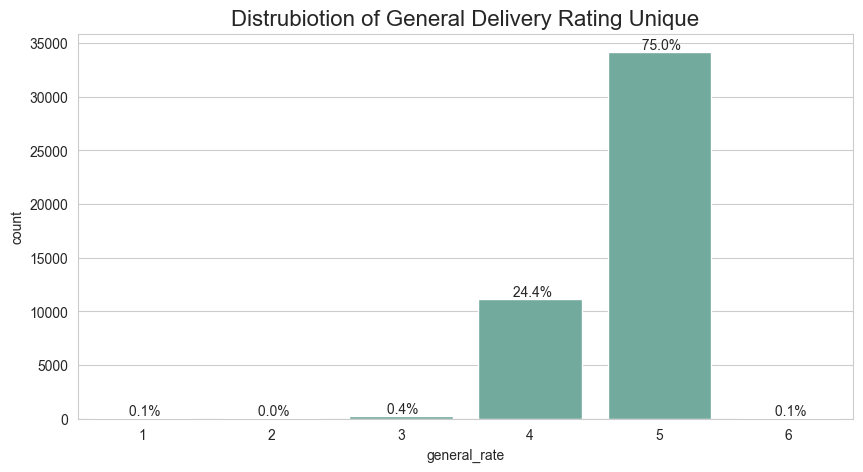

In [18]:
countplot(
    data = data,
    column_name = 'general_rate',
    bar_labels = True,
    title = 'Distrubiotion of General Delivery Rating Unique'
);

Oh! Here, I figureed out I have outlier rate **(6)** , Generaly there has been rate between (0,5), Let`s Explor

In [19]:
data[data['delivery_person_ratings']> 5 ].head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,time_taken(min),general_rate
3586,46D,BANGRES05DEL01,50,6.000,-12.970,-77.646,13.010,77.686,Meal,electric_scooter,25,6
4714,493,HYDRES17DEL01,50,6.000,-17.452,-78.386,17.562,78.496,Snack,bicycle,27,6
5169,4F2,JAPRES08DEL01,50,6.000,-26.910,-75.783,27.020,75.893,Drinks,scooter,20,6
5362,430,BANGRES19DEL01,50,6.000,12.914,77.678,13.024,77.788,Meal,electric_scooter,18,6
5651,BEF 1.00,AGRRES13DEL02,50,6.000,-27.160,-78.043,27.210,78.093,Drinks,scooter,20,6


In [20]:
data[data['delivery_person_ratings']> 5 ].groupby(data['delivery_person_age']).size()

delivery_person_age
50    53
dtype: int64

I have 53 Rows with 6 Rate

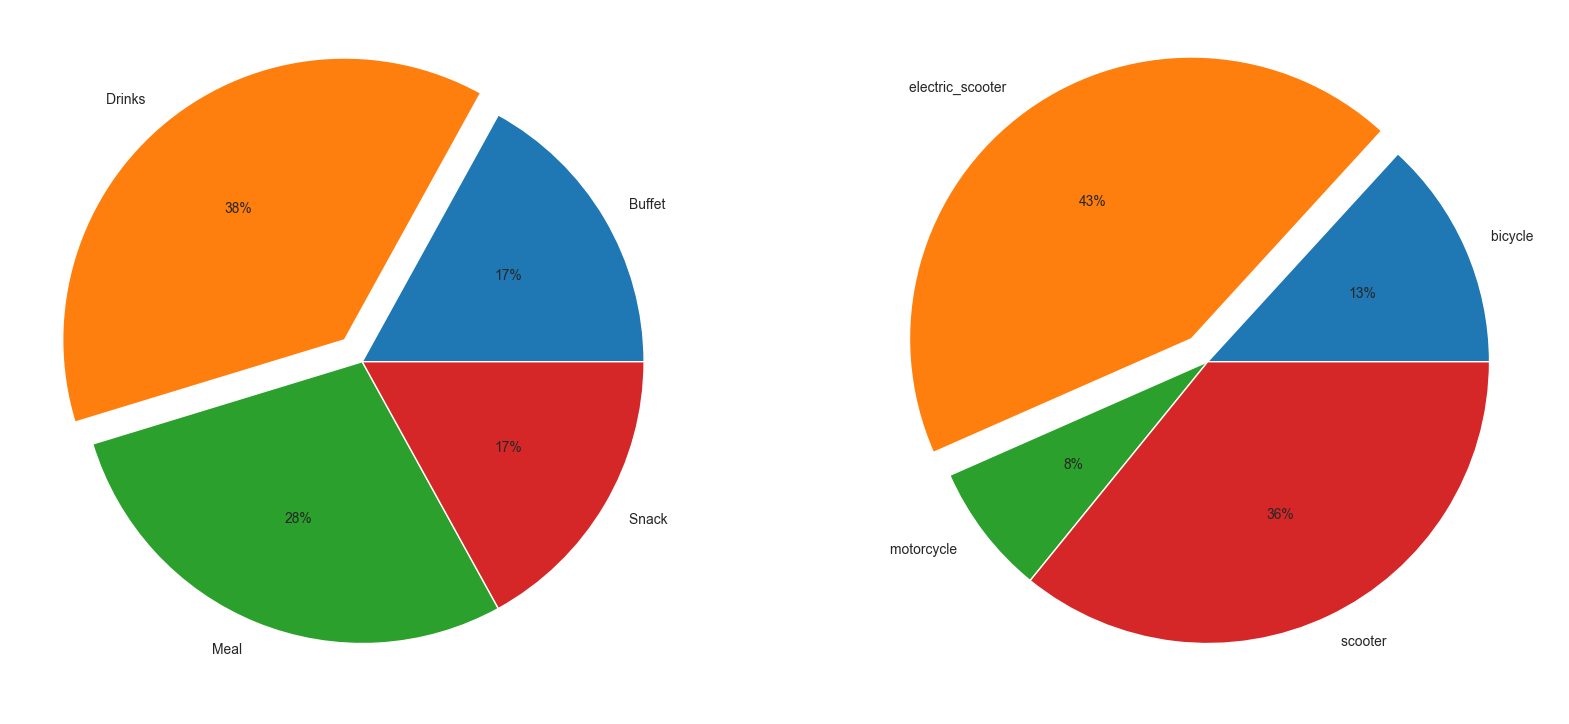

In [21]:
fig, ax = plt.subplots(ncols=2 , nrows=1, figsize=(20,15))
explode = [0, 0.1, 0, 0]

data[data['delivery_person_ratings'] > 5 ].groupby(data['type_of_order']).size().plot(kind='pie',autopct='%1.0f%%', explode= explode, ax=ax[0])
data[data['delivery_person_ratings']> 5 ].groupby(data['type_of_vehicle']).size().plot(kind='pie',autopct='%1.0f%%', explode=explode, ax=ax[1])

plt.show()

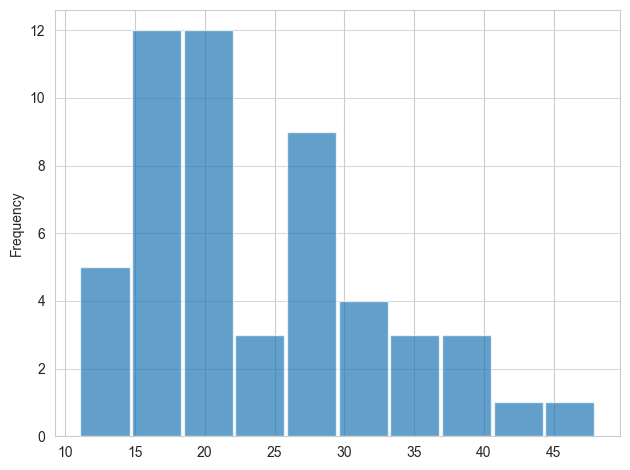

In [22]:
data[data['delivery_person_ratings'] > 5 ]['time_taken(min)'].plot(kind='hist',bins=10 ,alpha = 0.7 ,rwidth = 0.95)

plt.grid(axis= 'y' , alpha = 0.75)
plt.tight_layout()
plt.show()

Ploting age of the delivery portners distribution

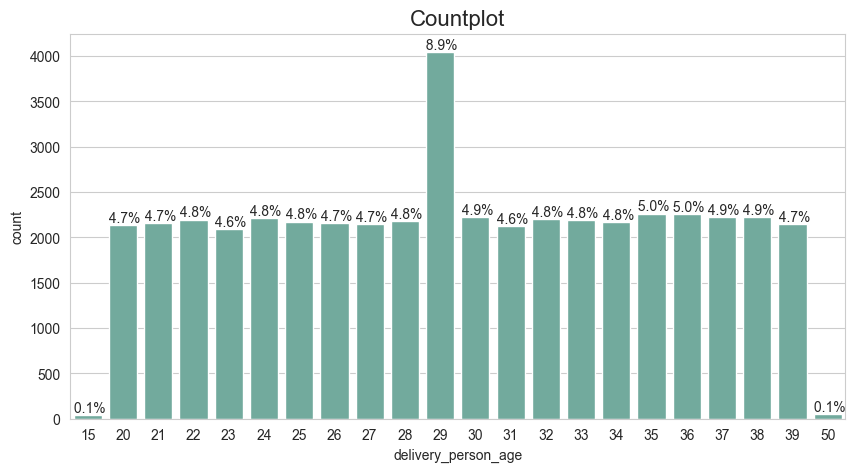

In [23]:
countplot(
    data = data,
    column_name = 'delivery_person_age',
    bar_labels = True,
);

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


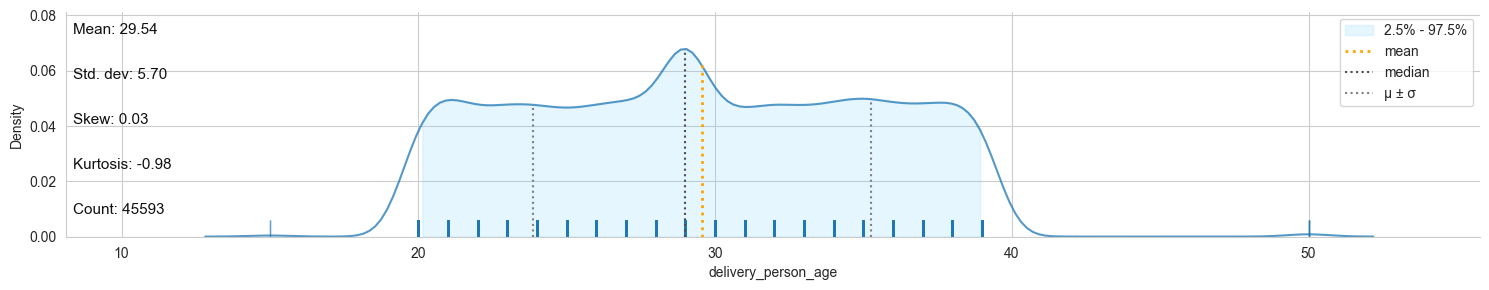

In [24]:
klib.dist_plot(data['delivery_person_age']);

Ploting Time taken distribution 

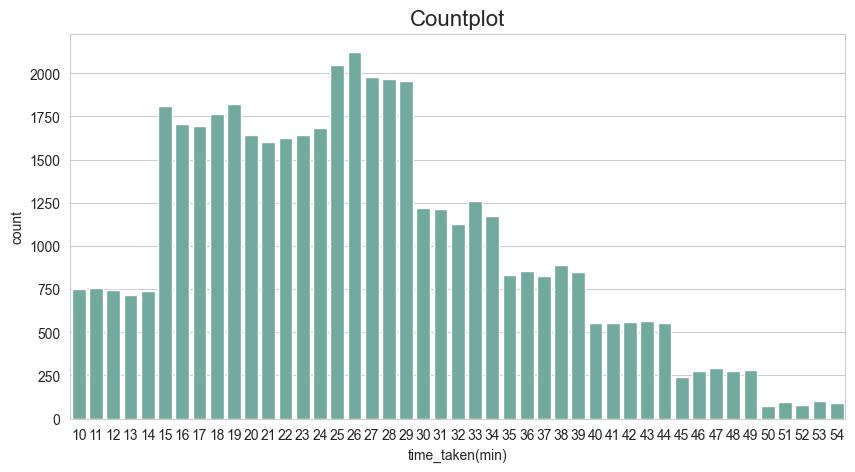

In [25]:
countplot(
    data = data,
    column_name = 'time_taken(min)',
);

Here snippet calculates the distance between two points on the Earth, specified by their latitude and longitude coordinates, using the **Haversine** formula. The calculation is done in Python, and it's applied to a dataset to compute distances between pairs of points (from a restaurant to a delivery location).

Now, I calculated the distance between the restaurant and the delivery location, also added a new feature in the dataset as `distance`.

In [26]:
# Set the earth's radius (in kilometers)
R = 6371

# Formula: radians = degrees * (π / 180)
# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    # lat1, lon1 are the latitude and longitude of the first point (e.g., a restaurant)
    d_lat = deg_to_rad(lat2-lat1)
    #  lat2, lon2 are the latitude and longitude of the second point (e.g., a delivery location).
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
    # The Haversine formula is then applied:
    # a calculates the square of half the chord length between the points.
    # c calculates the angular distance in radians.
    # The distance d is then found by multiplying c by the Earth's radius, R.
    # Returns the distance in kilometers between the two points.

# Calculate the distance between each pair of points
data['distance'] = np.nan
# data['distance'] = np.nan: Initializes a new column in the data DataFrame to store the calculated distances

# The loop iterates over each row in the data DataFrame:
# For each row, it calculates the distance between the restaurant's location (Restaurant_latitude, Restaurant_longitude) 
# and the delivery location (Delivery_location_latitude, Delivery_location_longitude) using the distcalculate function.

for i in range(len(data)):
    data.loc[i, 'distance'] = distcalculate(data.loc[i, 'restaurant_latitude'], 
                                        data.loc[i, 'restaurant_longitude'], 
                                        data.loc[i, 'delivery_location_latitude'], 
                                        data.loc[i, 'delivery_location_longitude'])

## Data Exploration

Now, let's analyze the data to discover relationships between the different features. To begin, I will examine the connection between the distance traveled and the time it takes to deliver the food.

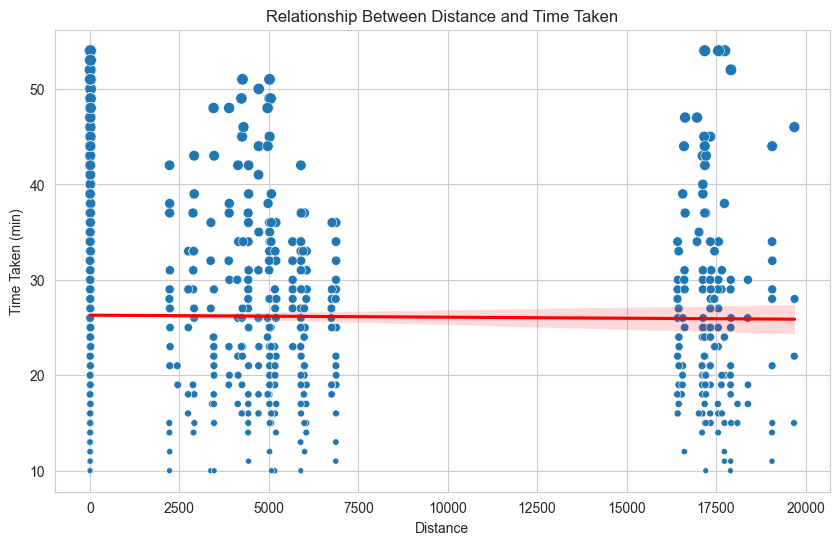

In [27]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x="distance", y="time_taken(min)", size="time_taken(min)", legend=False)

sns.regplot(data=data, x="distance", y="time_taken(min)", scatter=False, ax=scatter.axes, color='r')

plt.xlabel('Distance')
plt.ylabel('Time Taken (min)')
plt.title('Relationship Between Distance and Time Taken')
plt.show()

There is a clear connection between the time it takes and the distance covered for food delivery. This means that the majority of delivery partners are able to deliver food within 25-30 minutes, regardless of the distance involved.

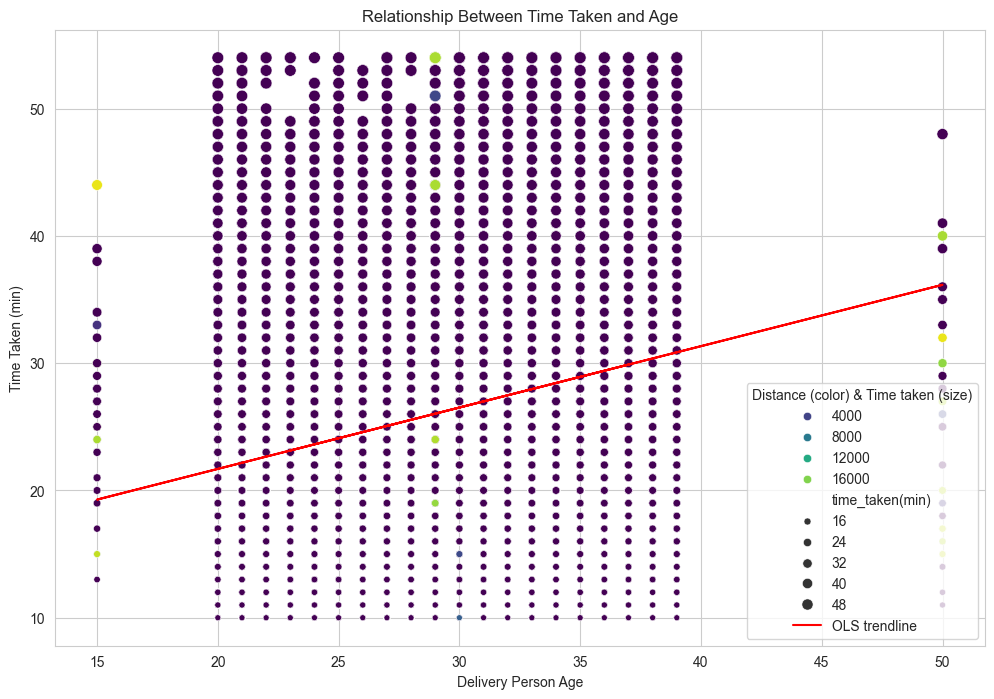

In [28]:
from scipy import stats

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=data, x="delivery_person_age", y="time_taken(min)", 
                          size="time_taken(min)", hue="distance", legend=True, palette='viridis')


slope, intercept, r_value, p_value, std_err = stats.linregress(data['delivery_person_age'], data['time_taken(min)'])
line = slope * data['delivery_person_age'] + intercept

plt.plot(data['delivery_person_age'], line, label='OLS trendline', color='red')

plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (min)')
plt.title('Relationship Between Time Taken and Age')

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:], title='Distance (color) & Time taken (size)')

plt.show()

This plot is a scatter plot showing the relationship between the age of a delivery person and the time taken for deliveries

- **Point Color**: The color of the points corresponds to the distance of the delivery. Darker colors represent shorter distances, while lighter colors imply longer distances. The exact distance values that these colors represent are likely included in a separate key or legend not visible in the image.

- **Point Size**: The size of the points indicates the actual time taken for the deliveries in minutes. Larger points suggest longer delivery times, while smaller points indicate shorter delivery times.

- **Trend Line (Red Line)**: A red trend line (OLS - Ordinary Least Squares regression line) has been added to the plot, suggesting a general trend or relationship between the age of the delivery person and the time taken for deliveries. In this case, the trend line is upward-sloping, indicating that as the age of the delivery person increases, there might be a tendency for the time taken for deliveries to increase as well.

- **Data Density**: There's a notable concentration of data points at certain ages, which could indicate that there are more delivery persons within those age ranges or that more data has been collected for those ages.

- **Outliers**: There are some points that stand out from the general pattern, particularly at higher ages. These could be outliers or could represent older delivery personnel who take significantly different amounts of time to complete deliveries compared to the average.

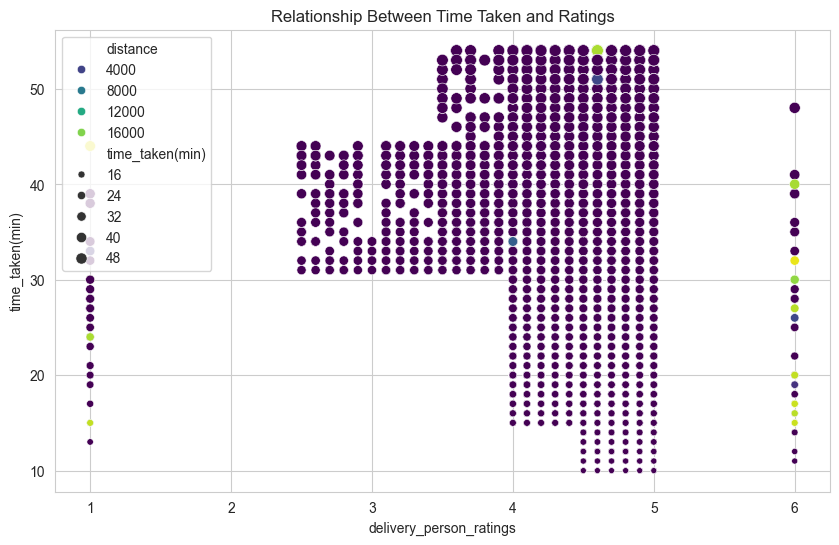

In [29]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x="delivery_person_ratings", y="time_taken(min)", 
                          size="time_taken(min)", hue="distance", palette="viridis", legend='brief')

plt.title('Relationship Between Time Taken and Ratings')
plt.show()

**the relationship between the time taken for deliveries and the ratings given to delivery personnel**

- A denser clustering of data points in certain areas, which could indicate common ratings and delivery times.
- Some isolated points (potential outliers) far from the main cluster, particularly at higher rating values.
- There does not appear to be a clear, consistent pattern between ratings and delivery times based on the dot distribution.
- The color coding for distance does not show a distinct trend in relation to ratings or time taken, based on the information provided.

## Data Preparation

First of all, I want to create **copy** of my dataset as df 

In [30]:
df = data.copy(deep=True)

Based on the given **ratings** in the dataset, I have determined that ratings above 5 are considered **outliers**. Therefore, I have made the decision to remove any ratings that are equal to or greater than 6.

In [31]:
df = df[df['delivery_person_ratings'] <= 5]

In [32]:
print(f"Maximum value rating in data {data['delivery_person_ratings'].max()}")
print('*' * 20)
print(f"Maximum value rating in df {df['delivery_person_ratings'].max()}")

Maximum value rating in data 6.0
********************
Maximum value rating in df 5.0


Ok, Here I want to drop unrelated and unuseful columns 

In [33]:
drop_columns = ['id','delivery_person_id', 
                'restaurant_latitude','restaurant_longitude',
                'delivery_location_latitude','delivery_location_longitude']

df = df.drop(columns=drop_columns)

In [34]:
numerical_columns = get_column_types(df,verbose=False)['numerical']
categorical_columns = get_column_types(df,verbose=False)['categorical']

In [35]:
calculate_vif(df,numerical_columns)

,Feature,VIF
0,const,292.278
1,delivery_person_age,1.097
2,delivery_person_ratings,3.205
3,time_taken(min),1.233
4,general_rate,3.179
5,distance,1.007


In [36]:
calculate_pointbiserial_correlation(df, categorical_columns, 'time_taken(min)')

,Category,Correlation,P-value
4,type_of_vehicle_motorcycle,0.164,0.000
1,type_of_order_Meal,0.008,0.091
2,type_of_order_Snack,-0.001,0.865
0,type_of_order_Drinks,-0.006,0.174
3,type_of_vehicle_electric_scooter,-0.058,0.000
5,type_of_vehicle_scooter,-0.137,0.000


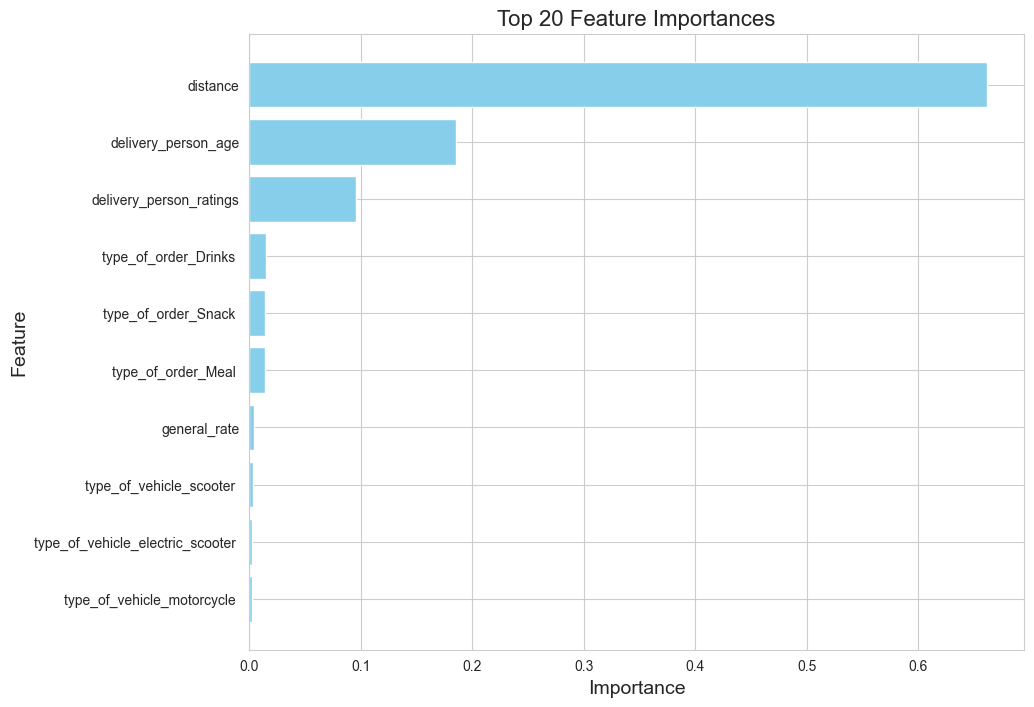

In [37]:
train_and_plot_feature_importances(df, 'time_taken(min)', categorical_columns)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45540 entries, 0 to 45592
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delivery_person_age      45540 non-null  int64  
 1   delivery_person_ratings  45540 non-null  float64
 2   type_of_order            45540 non-null  object 
 3   type_of_vehicle          45540 non-null  object 
 4   time_taken(min)          45540 non-null  int64  
 5   general_rate             45540 non-null  int32  
 6   distance                 45540 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 2.6+ MB


In [40]:
from sklearn.model_selection import train_test_split

X = df.drop(['time_taken(min)', 'general_rate'], axis=1)
y = df['time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (36432, 5)
x_test shape: (9108, 5)
y_train shape: (36432,)
y_test shape: (9108,)


In [43]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler , StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Modeling

## Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [46]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['delivery_person_age', 'delivery_person_ratings', 'distance'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['type_of_order', 'type_of_vehicle'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [47]:
y_pred = model_lr.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = model_lr.score(X_test, y_test)
print('R-squared:', r2)

Mean Squared Error: 69.77922396519543
R-squared: 0.2046699712156098


**Mean Squared Error (MSE) and R-squared:**

* **MSE** = 69.77922396519543: This value indicates that on average, the squared difference between the actual and predicted values is **69.77**. This is a measure of the quality of the estimator; lower values are better.

* **R-squared** = 0.2046699712156098: This metric tells us that approximately **20.46%** of the variance in the target variable (time taken) is explained by the model. This is not particularly high, indicating that there's a lot of variability that the model isn't capturing.

In [51]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_lr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print('Cross-Validation MSE:', cv_mse)

Cross-Validation MSE: 69.77078978698088


**Cross-Validation MSE** = 69.77078978698088: This is very close to the MSE on the test set, suggesting that the model is consistent across different subsets of the data but confirms the model might not be powerful enough or is missing important features or interactions.

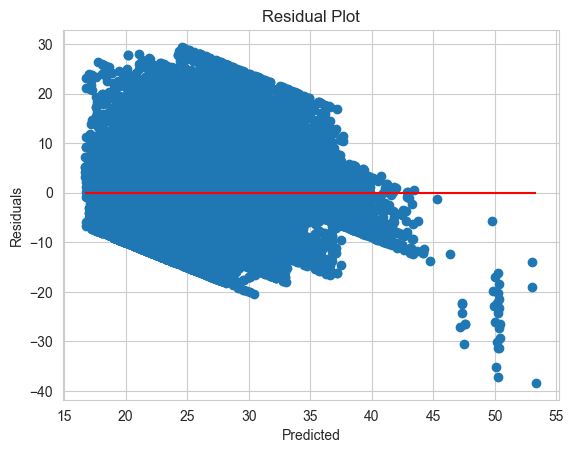

In [52]:
y_train_pred = model_lr.predict(X_train)

residuals = y_train - y_train_pred

plt.scatter(y_train_pred, residuals)
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Residual Plot Analysis:**

The residual plot shows a pattern which indicates that the variance of the residuals increases with the predicted value, suggesting heteroscedasticity. There is also a cluster of points for higher predicted values with larger negative residuals, indicating that the model underpredicts for these instances.

In [53]:
regressor = model_lr.named_steps['regressor']
preprocessor = model_lr.named_steps['preprocessor']

num_features = numerical_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

all_features = np.concatenate([num_features, cat_features])

coefficients = regressor.coef_

if coefficients.shape[0] == all_features.shape[0]:
    feature_importance = zip(all_features, coefficients)
    
    sorted_feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)
    
    for feature, coef in sorted_feature_importance:
        print(f'Feature: {feature}, Coefficient: {coef}')
else:
    print(f"Shape mismatch: Coefficients shape {coefficients.shape} vs Features shape {all_features.shape}")

Feature: type_of_order_Buffet , Coefficient: -108900833797048.23
Feature: type_of_order_Drinks , Coefficient: -108900833797048.02
Feature: type_of_order_Snack , Coefficient: -108900833797047.89
Feature: type_of_order_Meal , Coefficient: -108900833797047.8
Feature: type_of_vehicle_bicycle , Coefficient: -4932842184136.626
Feature: type_of_vehicle_electric_scooter , Coefficient: -4932842184133.815
Feature: type_of_vehicle_scooter , Coefficient: -4932842184133.738
Feature: type_of_vehicle_motorcycle , Coefficient: -4932842184130.781
Feature: delivery_person_ratings, Coefficient: -2.9043662359382436
Feature: delivery_person_age, Coefficient: 2.542487041223283
Feature: distance, Coefficient: -0.01013649588137916


**Feature Coefficients:**

The coefficients give us the expected change in the target variable for one unit of change in the feature, holding other features constant.

- `delivery_person_ratings`: The negative coefficient suggests that higher ratings are associated with decreased time taken, which could be intuitive if better ratings correlate with efficiency.
- `delivery_person_age`: The positive coefficient suggests that an increase in age is associated with an increase in time taken, perhaps reflecting slower delivery speeds with age.
- `type_of_vehicle`: Different types of vehicles have different coefficients, with 'motorcycle' having the largest positive effect on time taken, suggesting it's associated with longer delivery times under the model.
- `distance`: The negative coefficient here suggests that longer distances are surprisingly associated with less time taken, which might indicate an issue with the data or the need for further feature engineering.
- `type_of_order`: 'Meal' has a positive coefficient, while 'Drinks' has a negative one, although both are quite small in magnitude, suggesting minimal impact on the time taken.

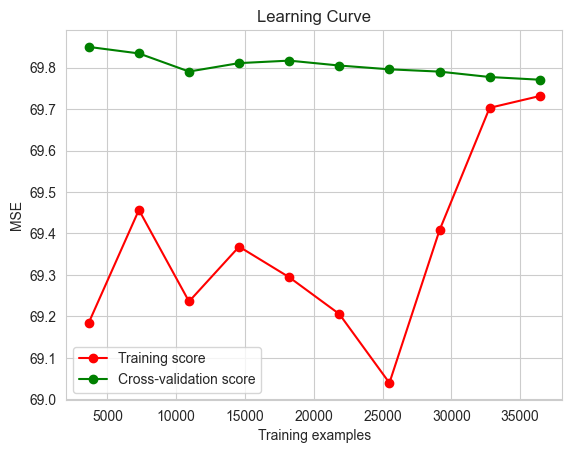

In [54]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_lr, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

**Learning Curve Analysis:**

The learning curve shows that the training score remains relatively constant as more training examples are added, while the cross-validation score shows some volatility but generally remains constant after a certain number of training examples. The gap between the training and cross-validation scores indicates that the model may be overfitting, although both scores being relatively high also suggests that the model might be underperforming overall.

## RandomForestRegressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)

In [56]:
from scipy import stats

Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

outliers = (y_train < (Q1 - 1.5 * IQR)) | (y_train > (Q3 + 1.5 * IQR))

x_train_filtered = X_train[~outliers]
y_train_filtered = y_train[~outliers]

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[numerical_cols])

x_train_scaled = scaler.transform(X_train[numerical_cols])
x_test_scaled = scaler.transform(X_test[numerical_cols])

In [58]:
# Log-transform the target variable (I want to add error handling for non-positive values)
y_log = np.log(y_train[y_train > 0])

In [59]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [60]:
model_pipeline.fit(x_train_filtered, y_train_filtered)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['delivery_person_age', 'delivery_person_ratings', 'distance'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['type_of_order', 'type_of_vehicle'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [61]:
y_pred = model_pipeline.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = model_pipeline.score(X_test, y_test)
print('R-squared:', r2)

Mean Squared Error: 62.18574547476262


R-squared: 0.2912189627805186


In [63]:
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print('Cross-Validation MSE:', cv_mse)

Cross-Validation MSE: 62.29974333954385


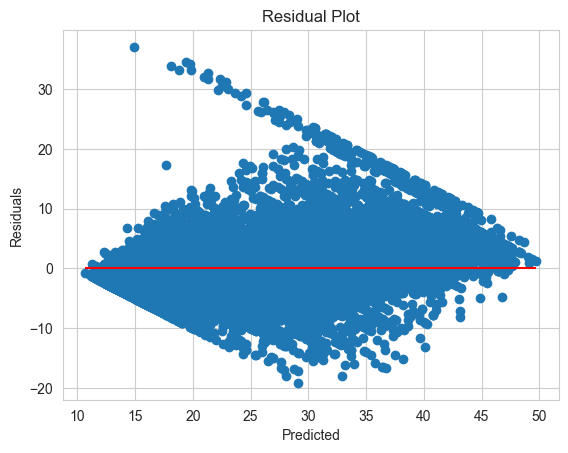

In [64]:
y_train_pred = model_pipeline.predict(X_train)

residuals = y_train - y_train_pred

plt.scatter(y_train_pred, residuals)
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

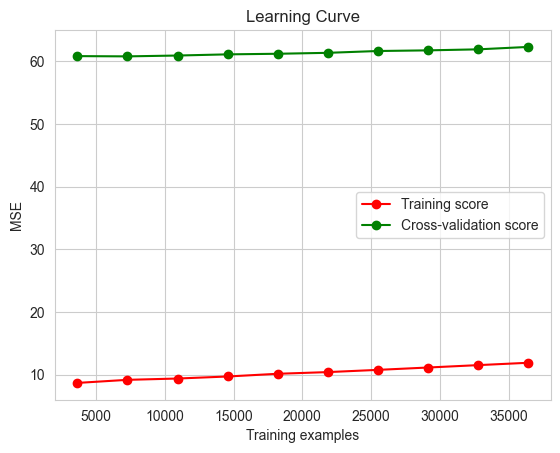

In [65]:
train_sizes, train_scores, test_scores = learning_curve(
    model_pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

## Hyperparameter Tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import randint as sp_randint

model_pipeline.set_params(regressor=RandomForestRegressor(random_state=42))

param_dist = {
    'regressor__n_estimators': sp_randint(100, 500),
    'regressor__max_depth': sp_randint(3, 20),
    'regressor__min_samples_split': sp_randint(2, 11),
    'regressor__min_samples_leaf': sp_randint(1, 11),
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(model_pipeline, param_distributions=param_dist,
                                   n_iter=50, cv=cv, scoring='neg_mean_squared_error', 
                                   random_state=42, verbose=1, n_jobs=-1)

In [72]:
random_search.fit(X_train, y_train)

print('Best parameters found: ', random_search.best_params_)

best_score = -random_search.best_score_
print('Best MSE from Random Search: ', best_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'regressor__max_depth': 7, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 225}
Best MSE from Random Search:  54.24155041409075


In [73]:
best_model = random_search.best_estimator_

In [74]:
best_regressor = RandomForestRegressor(
    max_depth=random_search.best_params_['regressor__max_depth'],
    min_samples_leaf=random_search.best_params_['regressor__min_samples_leaf'],
    min_samples_split=random_search.best_params_['regressor__min_samples_split'],
    n_estimators=random_search.best_params_['regressor__n_estimators'],
    random_state=42,
    n_jobs=-1
)

model_pipeline.set_params(regressor=best_regressor)
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['delivery_person_age', 'delivery_person_ratings', 'distance'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=7, n_estimators=225, n_jobs=-1,
                                       random_state=42))])

In [76]:
y_pred = model_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = model_pipeline.score(X_test, y_test)
print('R-squared:', r2)

Mean Squared Error: 54.58356572172686
R-squared: 0.3778671296449393


## LSTM neural network